### Create Libraries

In [1]:
### Import Libraries
# Data Processing
import pandas as pd
import numpy as np

# Neural Network
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (
    mean_squared_error, r2_score
)
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt



### Load Data

In [2]:
training = 'archive/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv'
test = 'archive/Uniqlo(FastRetailing) 2017 Test - stocks2017.csv'

df_train = pd.read_csv(training)
df_test = pd.read_csv(test)

df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


### Process Data
- Reformat date (year-month-day) to separate Year Month Date columns

In [3]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day

df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day

df_train.drop(columns=['Date'], inplace=True)
df_test.drop(columns=['Date'], inplace=True)

### Splitting Data

In [4]:
target_column = 'Close'  # Target variable
X_train = df_train.drop(columns=[target_column])
y_train = df_train[target_column]

X_test = df_test.drop(columns=[target_column])
y_test = df_test[target_column]


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Neural Networks

In [6]:
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

c:\Users\ashna\OneDrive - stevens.edu\AAI-595\aai595\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

#### Test Predictions

In [7]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


#### Model Predictions

In [105]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae = np.mean(np.abs(y_test - y_pred_test))
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("Training Mean Squared Error:", mse_train)
print("Training R^2 Score:", r2_train)
print("R^2 Score:", r2_test)
print("Testing Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape, "%")


Training Mean Squared Error: 342982.58961790043
Training R^2 Score: 0.9970655933898876
R^2 Score: 0.5301638306813661
Testing Mean Squared Error: 1862785.349429367
Root Mean Squared Error: 1364.8389463337303
Mean Absolute Error: 1310.477085507134
Mean Absolute Percentage Error: 3.3155489789750257 %


#### PLot the Neural Networks

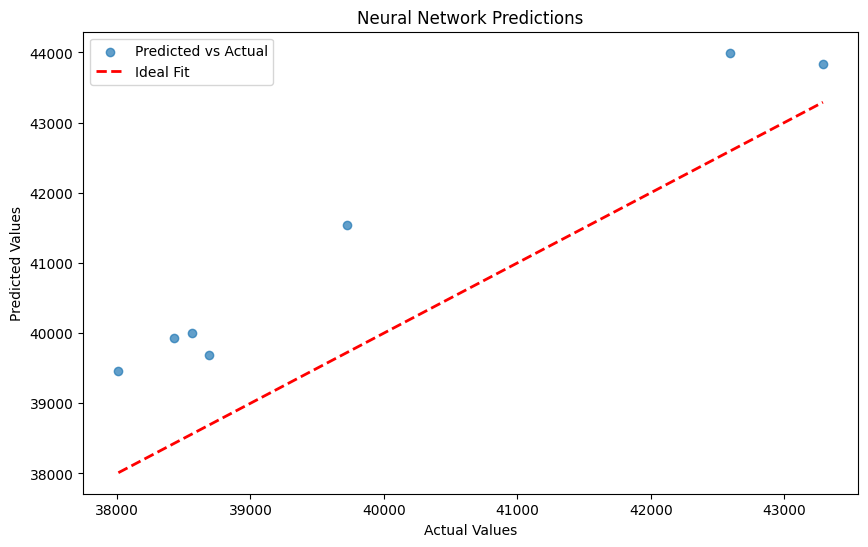

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network Predictions')
plt.legend()
plt.show()